In [1]:
import numpy as np
import pandas as pd
import ast
from datetime import datetime
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import os
root = os.getcwd()

In [3]:
yelp=pd.read_csv(root + "/../yelp/processed.csv")

## one-hot: attributes

In [4]:
import ast
nonstr = ast.literal_eval(yelp["attributes"].values[0])

import ast
def str2dict(strJson):
  nonstr = ast.literal_eval(strJson)
  
  for i in nonstr:
    nonstr[i]=ast.literal_eval(nonstr[i])

  return nonstr

  df=pd.json_normalize(nonstr)
  df.columns="attributes."+df.columns
  return df

def dict2df(colName):
  targetDict=np.array([])
  for i in yelp[colName].values:
    targetDict = np.append(targetDict, str2dict(i))

  targetDF=pd.json_normalize(targetDict)
  targetDF.columns = colName + "." + targetDF.columns
  return targetDF

attDF=dict2df("attributes")
attDF=attDF.fillna(False)

attDF=attDF[attDF.dtypes[attDF.dtypes=="bool"].keys()]
attDF.isnull().sum().sum()

0

# String ID to Integer ID

In [5]:
userEncoder = LabelEncoder()
userIID = userEncoder.fit_transform(yelp["user_id"])
yelp["userIntID"]=pd.Series(userIID)

In [6]:
restEncoder = LabelEncoder()
restIID = restEncoder.fit_transform(yelp["business_id"])
yelp["restIntID"]=pd.Series(restIID)
yelp

,review_id,user_id,business_id,review_star,date,text,name,address,latitude,longitude,...,review_count,attributes,categories,hours,user_name,friends,user_stars,additional_text,userIntID,restIntID
0,KY8dRN_k2EoR_QujKAegTQ,ARFM4LrI_zxogm1L29ZKng,UmjITdXHhEF46ho6IhaGQg,3.0,2019-02-14 17:06:51,Delete out at this Dave and busters was a litt...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Farrah,"iLYJxAravwLXXKj7GLHo9g, zY9qmzJ4QCxejVAvkFiDyw...",3.94,"When you dine in, the food is delivered to you...",1949,914
1,o_Zi01b_Vr0_8EIqEPDDVQ,ARFM4LrI_zxogm1L29ZKng,EME5hqQLjBD7e2cLryupbA,5.0,2019-03-26 17:02:43,I had an amazing time at Mr. Ed's and the food...,Mr Ed's Oyster Bar - Bienville,512 Bienville St,29.953705,-90.066015,...,1306,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Cajun/Creole, Southern, French, Salad, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",Farrah,"iLYJxAravwLXXKj7GLHo9g, zY9qmzJ4QCxejVAvkFiDyw...",3.94,"For faster seating, use the app to check in be...",1949,447
2,IRHj0qVq1m9jN7z6GkZ1Fg,qQLZBmmnAvi9N7_Bymc6hA,UmjITdXHhEF46ho6IhaGQg,1.0,2020-01-31 07:24:56,Took forever to get drinks. Were told there wa...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,Their hours have changed for the fall 2019...1...,9378,914
3,yBn5lrJ6ZxEvdC7BDJ-qdw,qQLZBmmnAvi9N7_Bymc6hA,UmjITdXHhEF46ho6IhaGQg,1.0,2019-12-28 05:23:47,Been here twice first and last time. It takes ...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,Until we meet again!,9378,914
4,PaIK__J-Qm7Y3u-iA8kGQA,qQLZBmmnAvi9N7_Bymc6hA,xbgzX-_EpV6yH-6nf2LCNw,1.0,2019-12-26 12:55:21,Tried to give this place one more try. It is s...,McDonald's,3250 General Degaulle Dr,29.926163,-90.022580,...,23,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Restaurants, Sandwiches, Coffee & Tea, B...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,they have the impossible burger!!!,9378,1754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31621,jvcrBHuO_9TdErc0TMqokw,eGqr3lwwonUATMeKp7QpHg,-ojG1NfFYuHN_oGsGK1W8Q,4.0,2021-03-16 04:17:03,"Saw this spot on Yelp, we were tired and hungr...",The Little Easy,634 Julia St,29.945644,-90.071374,...,52,"{'Alcohol': ""u'full_bar'"", 'CoatCheck': 'False...","Restaurants, Nightlife, Sandwiches, Sports Bar...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",Sheronda,"v2ErOtodrXqL6tOV9LBpYw, V-Iv7rt3301xvg0di3dTxg...",3.73,NaN,7291,22
31622,BEM9YZIiiSZEvQ93AJ4ACw,y6SzYr7xpMmpobNmWaTZTQ,7ZV31rGcDaT1pUKyvJF9Mg,5.0,2020-10-11 12:03:06,Holy sh*t. My favorite baker who opened and ra...,Celtica French Bakery,218 Robert E Lee Blvd,30.019734,-90.111988,...,29,"{'BusinessParking': ""{'garage': False, 'street...","Food, Restaurants, Bakeries, Breakfast & Brunc...","{'Wednesday': '7:0-15:0', 'Thursday': '7:0-15:...",Jennifer,"QaLpN4czjYMhNms2r45Iwg, RAdOVAGwzJG_ul8T46AR4A...",3.92,NaN,10705,259
31623,YFGer7LZzfgtLYc7EPc6lg,0qlZ8SHk2WrzG5dg_D9fBA,I1LP0Vg55lwufnoNREE1KA,1.0,2019-04-09 01:48:27,Writing this review in hopes of alerting the p...,McDonald's,2856 S Claiborne,29.941588,-90.095297,...,25,"{'GoodForKids': 'True', 'RestaurantsAttire': ""...","Restaurants, Coffee & Tea, Fast Food, Food, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Peggy,"WCPMwOPWjA

In [7]:
yelp[['userIntID', 'user_id']].to_csv('userid_map.csv', index = False)
yelp[['restIntID', 'business_id']].to_csv('restid_map.csv', index = False)

In [8]:
# oneYelp=pd.concat([yelp, attDF, timeDF, catDF], axis = 1)
oneYelp=pd.concat([yelp, attDF], axis = 1)

# Data for model

In [9]:
userRest = oneYelp[["userIntID", "restIntID", "review_star"]]
userRest.dtypes

userIntID        int64
restIntID        int64
review_star    float64
dtype: object

In [10]:
feature_DF = oneYelp.select_dtypes(include=bool)
feature_DF.dtypes

attributes.HappyHour                         bool
attributes.GoodForKids                       bool
attributes.BikeParking                       bool
attributes.CoatCheck                         bool
attributes.RestaurantsTableService           bool
                                             ... 
attributes.DietaryRestrictions.vegan         bool
attributes.DietaryRestrictions.kosher        bool
attributes.DietaryRestrictions.halal         bool
attributes.DietaryRestrictions.soy-free      bool
attributes.DietaryRestrictions.vegetarian    bool
Length: 68, dtype: object

In [11]:
(feature_DF.sum()>19000).loc[feature_DF.sum()>19000].index[:-1]

Index(['attributes.GoodForKids', 'attributes.BikeParking',
       'attributes.RestaurantsTableService', 'attributes.HasTV',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsGoodForGroups',
       'attributes.BusinessParking.street'],
      dtype='object')

In [12]:
feature_DF=feature_DF[(feature_DF.sum()>19000).loc[feature_DF.sum()>19000].index[:-1]]

In [13]:
feature_DF=feature_DF.astype(int)

In [14]:
model_DF = pd.concat([userRest, feature_DF], axis=1)
model_DF

,userIntID,restIntID,review_star,attributes.GoodForKids,attributes.BikeParking,attributes.RestaurantsTableService,attributes.HasTV,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsTakeOut,attributes.RestaurantsGoodForGroups,attributes.BusinessParking.street
0,1949,914,3.0,1,1,1,1,1,1,1,0
1,1949,447,5.0,1,1,1,1,1,1,1,1
2,9378,914,1.0,1,1,1,1,1,1,1,0
3,9378,914,1.0,1,1,1,1,1,1,1,0
4,9378,1754,1.0,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
31621,7291,22,4.0,0,1,1,1,1,1,0,1
31622,10705,259,5.0,0,0,0,0,0,0,0,0
31623,336,567,1.0,1,0,0,1,1,1,1,0
31624,6831,1288,5.0,0,0,0,0,0,1,0,1


In [15]:
rr = model_DF[['userIntID', 'restIntID', 'review_star']]
rrr = model_DF.iloc[:, 1:].drop('review_star', axis = 1)

In [16]:
rrr

,restIntID,attributes.GoodForKids,attributes.BikeParking,attributes.RestaurantsTableService,attributes.HasTV,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsTakeOut,attributes.RestaurantsGoodForGroups,attributes.BusinessParking.street
0,914,1,1,1,1,1,1,1,0
1,447,1,1,1,1,1,1,1,1
2,914,1,1,1,1,1,1,1,0
3,914,1,1,1,1,1,1,1,0
4,1754,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
31621,22,0,1,1,1,1,1,0,1
31622,259,0,0,0,0,0,0,0,0
31623,567,1,0,0,1,1,1,1,0
31624,1288,0,0,0,0,0,1,0,1


# system

In [17]:
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import math
import datetime
from tqdm.auto import tqdm


In [18]:
# change str id to int id
def ids2i(df,sid,iid):
    id=df[[sid,iid]].drop_duplicates()
    id=id.set_index(iid)[sid].to_dict()
    id=dict(sorted(id.items()))
    return id

userIDs2i=ids2i(yelp,"user_id","userIntID")
restIDs2i=ids2i(yelp,"business_id","restIntID")

In [19]:
model_DF.iloc[3][3:]

attributes.GoodForKids                   1.0
attributes.BikeParking                   1.0
attributes.RestaurantsTableService       1.0
attributes.HasTV                         1.0
attributes.BusinessAcceptsCreditCards    1.0
attributes.RestaurantsTakeOut            1.0
attributes.RestaurantsGoodForGroups      1.0
attributes.BusinessParking.street        0.0
Name: 3, dtype: float64

In [20]:
class userData(Dataset):
    def __init__(self, data):
        self.data=data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row=self.data.iloc[index]
        user=torch.tensor(row["userIntID"], dtype=torch.long)
        restaurant = torch.tensor(row["restIntID"], dtype=torch.long)
        rating = torch.tensor(row["review_star"], dtype=torch.float32)
        attributes = torch.tensor(row[3:], dtype=torch.long)

        return user, restaurant, rating, attributes

In [21]:
def dataloader(data, batch_size, shuffle, n_jobs=0):
    dataset = userData(data)
    dataloader = DataLoader(
        dataset, batch_size,
        shuffle, drop_last=False,
        num_workers=n_jobs, pin_memory=True)
    return dataloader

In [22]:
yelp_train, yelp_test=train_test_split(model_DF, test_size=0.2, random_state=4016)

batch_size=128

trainLoader = dataloader(yelp_train, batch_size=batch_size, shuffle=True)
valloader = dataloader(yelp_test, batch_size=batch_size, shuffle=False)

In [23]:
class ratingModel(nn.Module):
    def __init__(self, n_users, n_restaurants, n_attributes, embedding_dim=30, embedding_dropout=0.3):
        super(ratingModel, self).__init__()

        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.restaurant_embedding = nn.Embedding(n_restaurants, embedding_dim)
        self.attributes_embedding = nn.Embedding(n_attributes, embedding_dim)
        
        self.fc = nn.Sequential(
          nn.Linear(300, 64),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32,1)
        )
        
        self.drop = nn.Dropout(embedding_dropout)

    def forward(self, user, restaurant, attributes, minmax=None):
        user_embed = self.user_embedding(user)
        restaurant_embed = self.restaurant_embedding(restaurant)
        attributes_embed = self.attributes_embedding(attributes)
        #print(restaurant_embed.shape, len(restaurant))
        expected_size = user_embed.shape[0]  # Compute expected size of concatenation dimension
        attributes_embed = attributes_embed.reshape(expected_size, -1)  # Adjust size of x3 to match expected size
        x = torch.cat([user_embed, restaurant_embed, attributes_embed], dim=-1)
        x = self.drop(x)
        out = torch.sigmoid(self.fc(x))
        if minmax is not None:
            min_rating, max_rating = minmax
            out = out*(max_rating - min_rating + 1) + min_rating - 0.5
        return out

#train

In [24]:
n_user = len(userIDs2i)
n_rest = len(restIDs2i)
n_attr = model_DF.shape[1]-3

n_user, n_rest, n_attr

(11024, 1829, 8)

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
ratingPredictor = ratingModel(n_user, n_rest, n_attr).to(device)
ratingPredictor.device = device

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(ratingPredictor.parameters(), lr=5e-4, weight_decay=4e-6)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.3, patience=10, verbose=True)

n_epochs = 10
loss_record = {"train": [], "valid": []}
acc_record = {"train": [], "valid": []}

best_acc = 0
early_stop_when= 3
early_stop_cnt = 0

for epoch in range(n_epochs):
  ratingPredictor.train()
  
  running_loss = 0
  running_correct = 0
  train_user = 0
  for user, restaurant, rating, attributes in tqdm(trainLoader):
    user, restaurant, rating, attributes = user.to(device), restaurant.to(device), rating.to(device), attributes.to(device)
    
    optimizer.zero_grad()
    pred_rating = ratingPredictor(user, restaurant, attributes, minmax=(0,5)).squeeze()
    pred_rating = pred_rating.float()
    rating = rating.to(torch.float)
    loss = criterion(pred_rating, rating)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
    # Compute the absolute difference between predicted and ground-truth ratings
    #print(pred_rating[0], rating[0], '######')
    diff = torch.abs(pred_rating - rating)
    # Check if the difference is less than or equal to 
    within_range = torch.le(diff, 0.5)
    running_correct += within_range.sum().item()
    #running_correct += (predicted_labels == rating).sum().item()
    train_user += len(user)

  train_loss = running_loss/len(trainLoader)
  train_acc = running_correct/train_user
  loss_record["train"].append(train_loss)
  acc_record["train"].append(train_acc)

  print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss}, Train Accuracy: {train_acc}")

  ratingPredictor.eval()
  with torch.no_grad():
    total_loss = 0
    correct = 0
    valid_user = 0
    for user, restaurant, rating, attributes in tqdm(valloader):
      user, restaurant, rating, attributes = user.to(device), restaurant.to(device), rating.to(device), attributes.to(device)
      pred_rating = ratingPredictor(user, restaurant, attributes, minmax=(0,5)).squeeze()
      pred_rating = pred_rating.float()
      #pred_rating = torch.round(pred_rating)
      rating = rating.to(torch.float)
      loss = criterion(pred_rating, rating)
      total_loss += loss.item()
      # Compute the absolute difference between predicted and ground-truth ratings
      diff = torch.abs(pred_rating - rating)
      # Check if the difference is less than or equal to 0.5
      within_range = torch.le(diff, 0.5)
      correct += within_range.sum().item()
      valid_user += len(user)

    valid_loss = total_loss / len(valloader)
    valid_acc = correct / valid_user
    loss_record["valid"].append(valid_loss)
    acc_record["valid"].append(valid_acc)
    scheduler.step(valid_loss)
    
    

    print(f"Epoch {epoch + 1}/{n_epochs}, Valid Loss: {valid_loss}, Valid Accuracy: {valid_acc}")
    
    if valid_acc > best_acc:
      best_acc = valid_acc
      early_stop_cnt = 0
      torch.save(ratingPredictor, "class_rating.pth")
      print('model saved')
    else:
      early_stop_cnt += 1
    
    print(f"early_stop_cnt: {early_stop_cnt}")
    if early_stop_cnt>early_stop_when:
      print(f"Early stop training after {epoch + 1} epochs")
      break

  0%|          | 0/198 [00:00<?, ?it/s]

/tmp/ipykernel_653285/2416465063.py:10: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  user=torch.tensor(row["userIntID"], dtype=torch.long)
/tmp/ipykernel_653285/2416465063.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  restaurant = torch.tensor(row["restIntID"], dtype=torch.long)
/tmp/ipykernel_653285/2416465063.py:13: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  attributes = torch.tensor(row[3:], dtype=torch.long)


Epoch 1/10, Train Loss: 1.5419657013633035, Train Accuracy: 0.26968379446640317


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/10, Valid Loss: 1.3566471099853517, Valid Accuracy: 0.26367372747391715
model saved
early_stop_cnt: 0


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 2/10, Train Loss: 1.4057741231388516, Train Accuracy: 0.27873517786561264


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/10, Valid Loss: 1.3484677028656007, Valid Accuracy: 0.2630414163768574
early_stop_cnt: 1


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 3/10, Train Loss: 1.391107880105876, Train Accuracy: 0.2800790513833992


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/10, Valid Loss: 1.3442430186271668, Valid Accuracy: 0.27679418273790707
model saved
early_stop_cnt: 0


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 4/10, Train Loss: 1.3879263307711092, Train Accuracy: 0.28367588932806326


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/10, Valid Loss: 1.343636224269867, Valid Accuracy: 0.26319949415112237
early_stop_cnt: 1


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 5/10, Train Loss: 1.377803796469563, Train Accuracy: 0.28711462450592884


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/10, Valid Loss: 1.329352912902832, Valid Accuracy: 0.2649383496680367
early_stop_cnt: 2


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 6/10, Train Loss: 1.3600872598513207, Train Accuracy: 0.2951778656126482


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6/10, Valid Loss: 1.3456299996376038, Valid Accuracy: 0.2605121719886184
early_stop_cnt: 3


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 7/10, Train Loss: 1.3382802169130306, Train Accuracy: 0.3032411067193676


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 7/10, Valid Loss: 1.3296434044837953, Valid Accuracy: 0.263989883022447
early_stop_cnt: 4
Early stop training after 7 epochs


In [26]:
def plot_learning_curve(loss_record, title='', metrics = "MSE loss"):
    ''' Plot learning curve of your DNN (train & valid loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['valid'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['valid'], c='tab:cyan', label='valid')
    plt.xlabel('Training steps')
    plt.ylabel(metrics)
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()

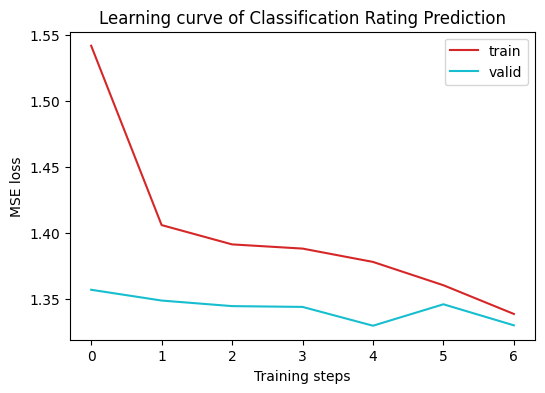

In [27]:
plot_learning_curve(loss_record, "Classification Rating Prediction")

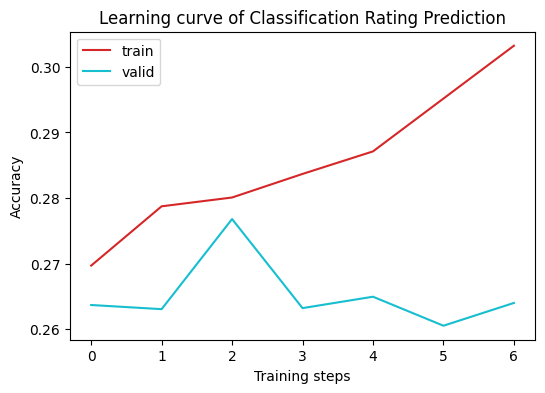

In [28]:
plot_learning_curve(acc_record, "Classification Rating Prediction", "Accuracy")

In [29]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

user_embed_matrix = ratingPredictor.user_embedding.weight.data.numpy()
rest_embed_matrix = ratingPredictor.restaurant_embedding.weight.data.numpy()
attr_embed_matrix = ratingPredictor.attributes_embedding.weight.data.numpy()

(11024, 30)
[[-0.01304227  0.1513243  -0.07236758  0.03347081 -0.02735551  0.7863847
  -0.02974185 -0.08640254 -0.02848681  0.03719382  0.20949122  0.00638621
  -0.0751224  -0.05323924 -0.11251557 -0.00919988  0.01058352 -0.01459257
   0.00150606  0.04273154 -0.03056783  0.3530874  -0.01603018  0.0193904
  -0.05794262 -0.00540027 -0.03016666  0.01423608  0.01487546 -0.3776481 ]
 [-0.01094441  0.22176063 -0.01898434 -0.11054146 -0.02223203  0.00379979
  -0.13310969  0.02959323 -0.07302114 -0.04751725 -0.08947363 -0.0521486
  -0.02172104 -0.03805739  0.0607665   0.00592201 -0.05010942  0.28021783
  -0.05020396  0.03577976  0.00141019  0.62855566  0.01991514  0.01505397
   0.01578573  0.02754786 -0.11725524  0.04142682 -0.11210071  0.620867  ]]


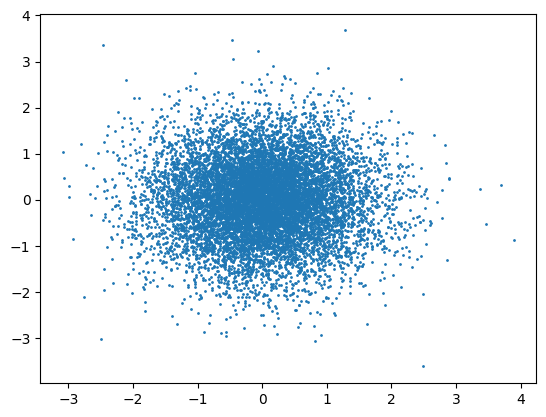

(1829, 30)
[[ 0.05963361 -0.08354785 -0.21198533 -0.21167096 -0.21745999  0.22903392
  -0.15223642 -0.04397691  0.283964   -0.32737738 -0.01461754 -0.03541106
  -0.02663393 -0.08951752  0.28562146 -0.33780625 -0.36118442  0.21673638
  -0.06376156  0.28689575  0.07370881 -0.15653387  0.03017634 -0.07330627
  -0.13015582 -0.00580346  0.18490455  0.11799631  0.0190298  -0.1252932 ]
 [ 0.1109369   0.16389725  0.268332   -0.03797831 -0.24639589 -0.3869465
   0.07227056  0.08676273 -0.01617835 -0.08326095 -0.12985565 -0.52218413
   0.09191723 -0.04167321 -0.02833375 -0.01365249 -0.08176926 -0.01408323
   0.06501934  0.15725145  0.23925206  0.27056283  0.09068625  0.31668836
  -0.05125606 -0.20139782  0.06024279  0.16461022 -0.07427119 -0.04535963]]


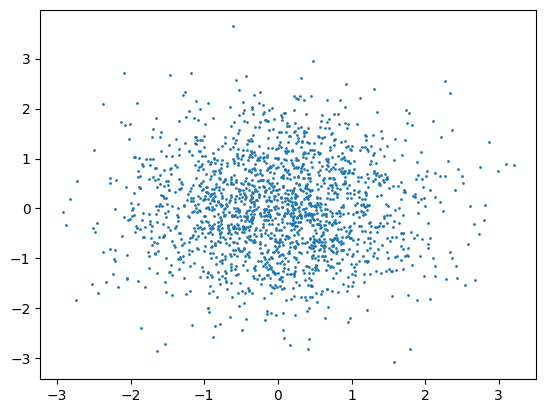

(8, 30)
[[-0.31795102 -0.05098237 -0.02225891 -0.02870516  0.17000198  0.1160477
   0.1249225   0.08375718  0.00727917 -0.36062717 -0.12287277  0.28457484
  -0.05680237  0.22449988 -0.07642104 -0.0460293  -0.3183218  -0.07560234
  -0.19425942  0.02450236  0.02695138 -0.26796636 -0.3792791   0.03621878
  -0.02284917 -0.13398057  0.15118232 -0.07564282 -0.36005205  0.0496144 ]
 [ 0.1321091   0.04760658 -0.14213908 -0.2469112   0.07058097  0.02347734
   0.13385883 -0.07428096 -0.31400496 -0.3312534  -0.2729216  -0.20080367
  -0.08283077  0.1470727  -0.10523818 -0.1418114   0.2581269  -0.00314713
  -0.00843422  0.20968282 -0.05991511 -0.11629589  0.27304113  0.09580678
   0.1696813   0.3481702   0.2114072   0.11357039 -0.06498457  0.252941  ]]


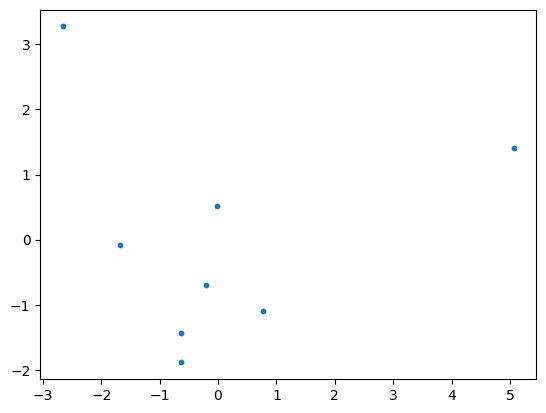

In [30]:
def visualize_embed(matrix, s=1):
    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=2)
    embedding_pca = pca.fit_transform(matrix)
    print(matrix.shape)
    print(pca.components_)
    # Plot the embeddings using a scatter plot
    plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], s=s)
    plt.show()
visualize_embed(user_embed_matrix)
visualize_embed(rest_embed_matrix)
visualize_embed(attr_embed_matrix, s = 10)

In [31]:
rating_predictor = torch.load('class_rating.pth')
rating_predictor.eval()

# Create input tensors for a single example
user = torch.tensor([0])
restaurant = torch.tensor([1])
attributes = torch.tensor([0, 1, 2, 3, 1, 1, 1, 1])

# Make a prediction using the model
rating = rating_predictor(user, restaurant, attributes, minmax=(0, 5))

# Print the predicted rating
print(f"Predicted rating: {rating.item()}")

Predicted rating: 4.226302146911621
